### IMPOSTAZIONI GENERALI

- **Modifiche possibili**: gestione migliore dei nomi per evitare sovrapposizione

### HOW TO USE

- **PER ORA**            : modificare la parte finale di file_names in base ai parametri impostati su test13.ipynb

In [1]:
import numpy as np

# Caricamento del file txt

filename = "planet_jupiter_v15_6fpy_1y.txt" 
data = np.loadtxt(filename)

# Calcolo di max e min per ciascuna colonna
x_max = np.max(data[:, 0])  # Massimo della prima colonna
x_min = np.min(data[:, 0])  # Minimo della prima colonna
y_max = np.max(data[:, 1])  # Massimo della seconda colonna
y_min = np.min(data[:, 1])  # Minimo della seconda colonna

margin = 0.20

# Stampa dei risultati
print(f"x_max = {x_max:.3e}, x_min = {x_min:.3e}")
print(f"y_max = {y_max:.3e}, y_min = {y_min:.3e}")

x_max = 7.780e+11, x_min = 6.720e+11
y_max = 3.930e+11, y_min = 6.870e+09


['planet_mercury.txt', 'planet_venus.txt', 'planet_earth.txt', 'planet_mars.txt']


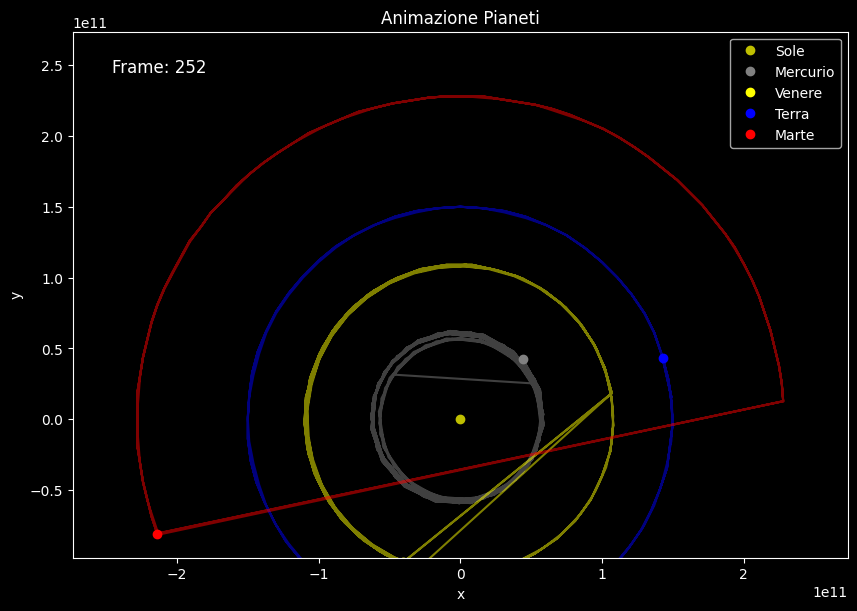

In [21]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Caricamento dei dati dai file txt
file_names = ["planet_mercury.txt", 
              "planet_venus.txt",
              "planet_earth.txt",
              "planet_mars.txt",     
              "planet_jupiter.txt",
              "planet_saturn.txt",
              "planet_uranus.txt",
              "planet_neptune.txt"]
label_names = ["Mercurio", 
               "Venere", 
               "Terra", 
               "Marte",
               "Giove", 
               "Saturno", 
               "Urano", 
               "Nettuno"] 
colors = ['gray', 'yellow', 'blue', 'red', 'orange', 'gold', 'cyan', 'purple']  

if scelta == 'i':
    selected_file_names = file_names[:4]
    selected_label_names = label_names[:4]
    selected_colors = colors[:4]
elif scelta == 'o':
    selected_file_names = file_names[4:8]
    selected_label_names = label_names[4:8]
    selected_colors = colors[4:8]
elif scelta == 'a':
    selected_file_names = file_names
    selected_label_names = label_names
    selected_colors = colors
    
print(selected_file_names)

data = [np.loadtxt(file_name) for file_name in selected_file_names] # lista di 4 array ognuno con contenuto dei file txt

# Controllo che i file abbiano lo stesso numero di righe
n_frames = min(len(d) for d in data)

# Impostazione del grafico
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(x_min + margin * x_min, x_max + margin * x_max)  
ax.set_ylim(y_min + margin * y_min, y_max + margin * y_max)  
ax.set_aspect('equal')
ax.set_title("Animazione Pianeti")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Aggiunta del Sole al centro
ax.plot(0, 0, "yo", label="Sole")

# Creazione dei punti grafici per ciascun pianeta
planets = [ax.plot([], [], "o", color=color, label=name)[0] for color,name in zip(selected_colors,selected_label_names)]

# Creazione delle traiettorie
trajectories = [ax.plot([], [], "-", color=color, alpha=0.5)[0] for color in selected_colors]

# Testo dinamico per il numero di frame
frame_text = ax.text(0.05, 0.95, "", transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Aggiunta della legenda
ax.legend(loc="upper right")

# Memorizzazione dei punti visitati
trajectory_data = [([], []) for _ in range(len(planets))]  # Una lista di tuple per ogni pianeta

# Funzione di inizializzazione
def init():
    for planet,trajectory in zip(planets,trajectories):
        planet.set_data([], [])
        trajectory.set_data([], [])
    frame_text.set_text("")
    return planets + trajectories + [frame_text]

# Funzione di aggiornamento per ogni frame
def update(frame):
    for i, (planet, trajectory) in enumerate(zip(planets,trajectories)):
        x, y = data[i][frame]
        planet.set_data([x], [y])  # Aggiorna le coordinate
        # Aggiorna la traiettoria
        trajectory_data[i][0].append(x)
        trajectory_data[i][1].append(y)
        trajectory.set_data(trajectory_data[i][0], trajectory_data[i][1])
        
    frame_text.set_text(f"Frame: {frame + 1}")  
    return planets + [frame_text]

# Creazione dell'animazione
ani = FuncAnimation(fig, update, frames=n_frames, init_func=init, blit=True, interval=50)

# Salvataggio
ani.save("AnimFromData.mp4", fps=30)  
plt.show()  